___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.isnull().sum().any()

False

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


In [7]:
df = df.drop(['RowNumber','Surname','CustomerId'], axis = 1)

In [9]:
df[df['EstimatedSalary']<1000]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
149,416,France,Male,32,0,0.000,2,0,1,878.870,0
195,807,France,Male,35,3,174790.150,1,1,1,600.360,0
393,556,Spain,Male,38,8,0.000,2,0,0,417.410,1
396,557,France,Male,33,3,54503.550,1,1,1,371.050,0
559,850,Spain,Female,70,5,0.000,1,1,1,705.180,0
925,714,Germany,Female,36,1,101609.010,2,1,1,447.730,0
932,708,Germany,Female,42,8,192390.520,2,1,0,823.360,0
982,668,France,Male,32,7,0.000,2,1,1,777.370,0
1139,727,Spain,Female,57,1,109679.720,1,0,1,753.370,0
1451,551,France,Female,38,10,0.000,2,1,1,216.270,0


In [10]:
df.sort_values(by='CreditScore').head(20)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8762,350,France,Female,60,3,0.000,1,0,0,113796.150,1
8723,350,France,Male,51,10,0.000,1,1,1,125823.790,1
1838,350,Germany,Male,39,0,109733.200,2,0,0,123602.110,1
9624,350,France,Female,40,0,111098.850,1,1,1,172321.210,1
1631,350,Spain,Male,54,1,152677.480,1,1,1,191973.490,1
2473,351,Germany,Female,57,4,163146.460,1,1,0,169621.690,1
1962,358,Spain,Female,52,8,143542.360,3,1,0,141959.110,1
1405,359,France,Female,44,6,128747.690,1,1,0,146955.710,1
1193,363,Spain,Female,28,6,146098.430,3,1,0,100615.140,1
2579,365,Germany,Male,30,0,127760.070,1,1,0,81537.850,1


In [11]:
df.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000,-0.004,0.001,0.006,0.012,-0.005,0.026,-0.001,-0.027
Age,-0.004,1.000,-0.010,0.028,-0.031,-0.012,0.085,-0.007,0.285
Tenure,0.001,-0.010,1.000,-0.012,0.013,0.023,-0.028,0.008,-0.014
Balance,0.006,0.028,-0.012,1.000,-0.304,-0.015,-0.010,0.013,0.119
NumOfProducts,0.012,-0.031,0.013,-0.304,1.000,0.003,0.010,0.014,-0.048
HasCrCard,-0.005,-0.012,0.023,-0.015,0.003,1.000,-0.012,-0.010,-0.007
IsActiveMember,0.026,0.085,-0.028,-0.010,0.010,-0.012,1.000,-0.011,-0.156
EstimatedSalary,-0.001,-0.007,0.008,0.013,0.014,-0.010,-0.011,1.000,0.012
Exited,-0.027,0.285,-0.014,0.119,-0.048,-0.007,-0.156,0.012,1.000


<AxesSubplot:>

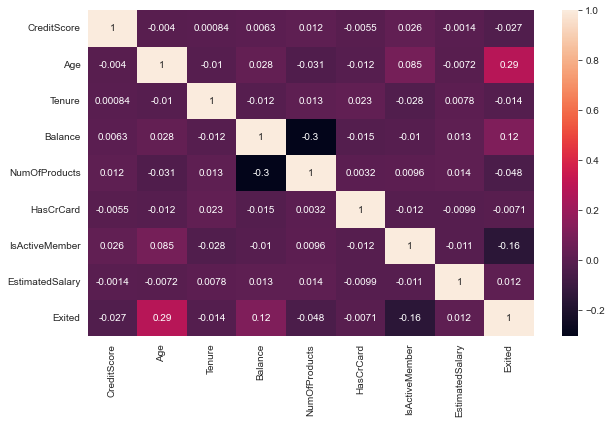

In [12]:
sns.heatmap(df.corr(),annot=True)

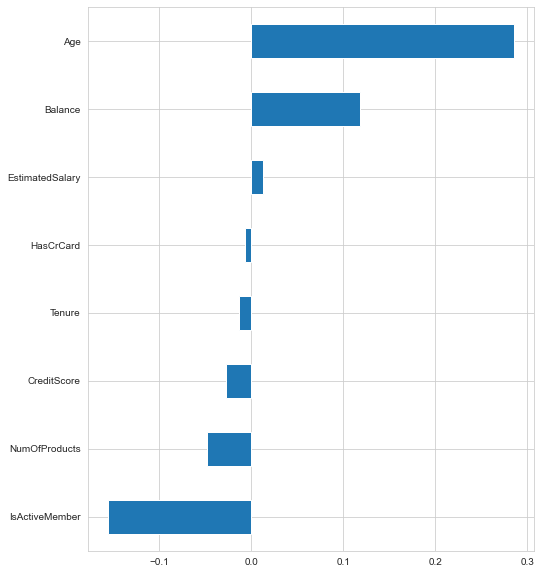

In [13]:
plt.figure(figsize = (8,10))
df.corr()["Exited"].sort_values().drop("Exited").plot(kind = "barh");


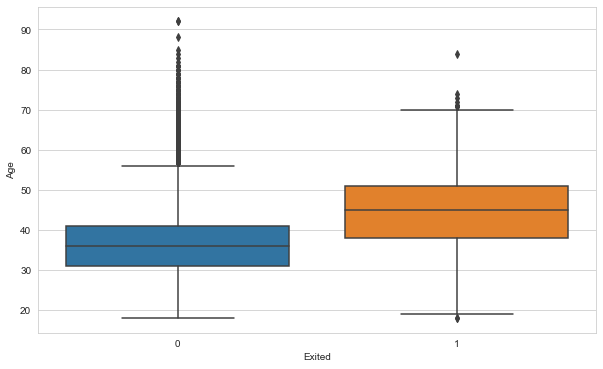

In [14]:
sns.boxplot(y = 'Age', x = 'Exited', data = df);


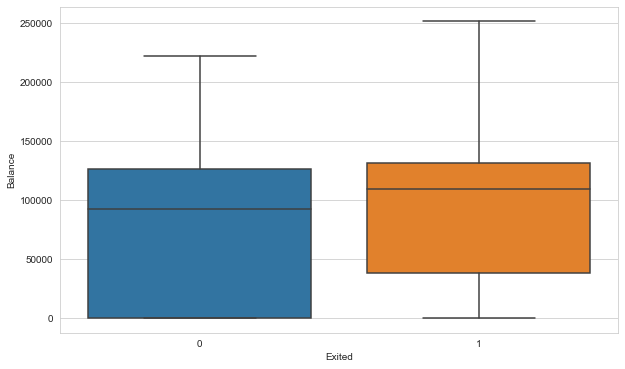

In [15]:
sns.boxplot(y = 'Balance', x = 'Exited', data = df);

In [16]:
df.groupby('Exited')['Balance'].mean()

Exited
0   72745.297
1   91108.539
Name: Balance, dtype: float64

In [17]:
df.groupby('Exited')['Age'].mean()

Exited
0   37.408
1   44.838
Name: Age, dtype: float64

In [18]:
df.groupby('Exited')['NumOfProducts'].mean()

Exited
0   1.544
1   1.475
Name: NumOfProducts, dtype: float64

In [19]:
df.groupby('Exited')['CreditScore'].mean()

Exited
0   651.853
1   645.351
Name: CreditScore, dtype: float64

In [ ]:
# df['Gender']=df['Gender'].apply(lambda x : 0 if x =='Female' else 1)

In [ ]:
# df['Geography'].unique()

In [ ]:
# df['Geography']=df['Geography'].apply(lambda x : 0 if x =='France' else( 1 if x == 'Spain' else 2) ) 

In [20]:
df=pd.get_dummies(df)


In [21]:
df.sample(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
4667,749,54,3,144768.940,1,1,0,93336.300,1,0,1,0,0,1
4056,655,28,3,113811.850,2,0,1,76844.230,0,0,0,1,1,0
9836,587,39,10,0.000,2,1,1,170409.450,0,1,0,0,0,1
3455,842,29,8,0.000,2,1,1,123437.050,0,1,0,0,0,1
6075,504,42,3,134936.970,2,0,0,135178.910,0,1,0,0,0,1
5548,710,38,2,0.000,2,1,0,96.270,0,1,0,0,0,1
7325,761,34,2,0.000,2,1,0,61251.250,0,0,0,1,1,0
7958,686,34,6,146178.130,2,1,1,88837.110,0,1,0,0,0,1
5327,850,25,8,69385.170,2,1,0,87834.240,0,0,1,0,1,0
4439,613,21,7,105627.950,1,1,1,36560.510,0,1,0,0,1,0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_France   10000 non-null  uint8  
 10  Geography_Germany  10000 non-null  uint8  
 11  Geography_Spain    10000 non-null  uint8  
 12  Gender_Female      10000 non-null  uint8  
 13  Gender_Male        10000 non-null  uint8  
dtypes: float64(2), int64(7), uint8(5)
memory usage: 752.1 KB


In [23]:
df.shape 

(10000, 14)

# Preprocessing of Data
- Train | Test Split, Scalling

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X = df.drop('Exited', axis = 1)
y = df['Exited']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=101)

In [28]:
from sklearn.preprocessing import MinMaxScaler  


In [29]:
scaler = MinMaxScaler()

In [30]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
X_train

array([[0.45      , 0.2972973 , 0.1       , ..., 0.        , 1.        ,
        0.        ],
       [0.55      , 0.18918919, 0.7       , ..., 1.        , 0.        ,
        1.        ],
       [0.77      , 0.74324324, 0.9       , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.498     , 0.58108108, 0.1       , ..., 0.        , 0.        ,
        1.        ],
       [0.73      , 0.21621622, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.516     , 0.2027027 , 0.4       , ..., 0.        , 1.        ,
        0.        ]])

# Modelling & Model Performance

In [32]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [34]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:", rmse)

In [35]:
X_train.shape

(9000, 13)

## without class_weigth

### Create The Model

In [52]:
from tensorflow.keras.optimizers import Adam


In [53]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV


In [54]:
seed = 1

In [55]:
tf.random.set_seed(seed)

model = Sequential()
model.add(Dense(20, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(5, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
opt =Adam(lr=0.001)
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics=['Recall']) # 'Recall'

In [56]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 20)                280       
                                                                 
 dense_5 (Dense)             (None, 10)                210       
                                                                 
 dense_6 (Dense)             (None, 5)                 55        
                                                                 
 dense_7 (Dense)             (None, 1)                 6         
                                                                 
Total params: 551
Trainable params: 551
Non-trainable params: 0
_________________________________________________________________


In [57]:
model.weights

[<tf.Variable 'dense_4/kernel:0' shape=(13, 20) dtype=float32, numpy=
 array([[-0.28557736,  0.3423844 ,  0.11169517, -0.05581927, -0.177435  ,
          0.12152618,  0.40575123, -0.05534735,  0.13653535,  0.08945549,
          0.11651975,  0.09760225,  0.33202595,  0.10895556,  0.02726841,
         -0.40424713, -0.05042192, -0.21092308,  0.32937223,  0.33028495],
        [ 0.24499458, -0.37561536, -0.36577243, -0.1633845 , -0.21219213,
          0.3483448 , -0.02432224, -0.21969469,  0.11342615,  0.07336757,
          0.34965944,  0.05981874, -0.00304061,  0.08009106,  0.03533426,
         -0.04868037, -0.17697315,  0.19950867,  0.35792464,  0.14371312],
        [-0.24211451, -0.26732486, -0.07916817, -0.41816163, -0.02935469,
         -0.1738129 ,  0.21330523,  0.01867378,  0.11694956,  0.05475619,
          0.06035361, -0.4046411 ,  0.09510291, -0.16147345, -0.00955439,
         -0.01155216, -0.37649363,  0.33921093, -0.13989356,  0.35712242],
        [ 0.12772429,  0.36590147, -0.0

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [58]:
model.fit(x = X_train, y = y_train, validation_split = 0.15, batch_size = 128, epochs = 200)

Epoch 1/200
60/60 [==============================] - 1s 6ms/step - loss: 0.5575 - recall: 0.0438 - val_loss: 0.4906 - val_recall: 0.0000e+00
Epoch 2/200
60/60 [==============================] - 0s 2ms/step - loss: 0.4787 - recall: 0.0000e+00 - val_loss: 0.4769 - val_recall: 0.0000e+00
Epoch 3/200
60/60 [==============================] - 0s 2ms/step - loss: 0.4670 - recall: 0.0000e+00 - val_loss: 0.4681 - val_recall: 0.0000e+00
Epoch 4/200
60/60 [==============================] - 0s 2ms/step - loss: 0.4585 - recall: 0.0000e+00 - val_loss: 0.4603 - val_recall: 0.0000e+00
Epoch 5/200
60/60 [==============================] - 0s 2ms/step - loss: 0.4513 - recall: 0.0032 - val_loss: 0.4534 - val_recall: 0.0071
Epoch 6/200
60/60 [==============================] - 0s 2ms/step - loss: 0.4448 - recall: 0.0193 - val_loss: 0.4466 - val_recall: 0.0607
Epoch 7/200
60/60 [==============================] - 0s 2ms/step - loss: 0.4388 - recall: 0.0657 - val_loss: 0.4384 - val_recall: 0.0929
Epoch 8/200
6

60/60 [==============================] - 0s 2ms/step - loss: 0.3327 - recall: 0.4778 - val_loss: 0.3343 - val_recall: 0.5321
Epoch 61/200
60/60 [==============================] - 0s 2ms/step - loss: 0.3318 - recall: 0.4862 - val_loss: 0.3324 - val_recall: 0.4714
Epoch 62/200
60/60 [==============================] - 0s 2ms/step - loss: 0.3318 - recall: 0.4849 - val_loss: 0.3338 - val_recall: 0.4464
Epoch 63/200
60/60 [==============================] - 0s 2ms/step - loss: 0.3313 - recall: 0.4765 - val_loss: 0.3323 - val_recall: 0.5179
Epoch 64/200
60/60 [==============================] - 0s 2ms/step - loss: 0.3329 - recall: 0.4920 - val_loss: 0.3339 - val_recall: 0.5357
Epoch 65/200
60/60 [==============================] - 0s 2ms/step - loss: 0.3310 - recall: 0.4810 - val_loss: 0.3324 - val_recall: 0.5250
Epoch 66/200
60/60 [==============================] - 0s 2ms/step - loss: 0.3295 - recall: 0.4926 - val_loss: 0.3377 - val_recall: 0.5500
Epoch 67/200
60/60 [===========================

60/60 [==============================] - 0s 2ms/step - loss: 0.3239 - recall: 0.4965 - val_loss: 0.3317 - val_recall: 0.4536
Epoch 120/200
60/60 [==============================] - 0s 2ms/step - loss: 0.3227 - recall: 0.4952 - val_loss: 0.3325 - val_recall: 0.5393
Epoch 121/200
60/60 [==============================] - 0s 2ms/step - loss: 0.3226 - recall: 0.5061 - val_loss: 0.3305 - val_recall: 0.4571
Epoch 122/200
60/60 [==============================] - 0s 2ms/step - loss: 0.3218 - recall: 0.4900 - val_loss: 0.3317 - val_recall: 0.5500
Epoch 123/200
60/60 [==============================] - 0s 2ms/step - loss: 0.3212 - recall: 0.4926 - val_loss: 0.3296 - val_recall: 0.5179
Epoch 124/200
60/60 [==============================] - 0s 2ms/step - loss: 0.3240 - recall: 0.5029 - val_loss: 0.3301 - val_recall: 0.5143
Epoch 125/200
60/60 [==============================] - 0s 2ms/step - loss: 0.3216 - recall: 0.4855 - val_loss: 0.3304 - val_recall: 0.5286
Epoch 126/200
60/60 [====================

60/60 [==============================] - 0s 2ms/step - loss: 0.3159 - recall: 0.4932 - val_loss: 0.3332 - val_recall: 0.5571
Epoch 179/200
60/60 [==============================] - 0s 2ms/step - loss: 0.3183 - recall: 0.5061 - val_loss: 0.3322 - val_recall: 0.4571
Epoch 180/200
60/60 [==============================] - 0s 2ms/step - loss: 0.3189 - recall: 0.4907 - val_loss: 0.3437 - val_recall: 0.6036
Epoch 181/200
60/60 [==============================] - 0s 2ms/step - loss: 0.3181 - recall: 0.5042 - val_loss: 0.3293 - val_recall: 0.4821
Epoch 182/200
60/60 [==============================] - 0s 2ms/step - loss: 0.3169 - recall: 0.5016 - val_loss: 0.3313 - val_recall: 0.5393
Epoch 183/200
60/60 [==============================] - 0s 2ms/step - loss: 0.3160 - recall: 0.5074 - val_loss: 0.3293 - val_recall: 0.5000
Epoch 184/200
60/60 [==============================] - 0s 2ms/step - loss: 0.3170 - recall: 0.5003 - val_loss: 0.3286 - val_recall: 0.4857
Epoch 185/200
60/60 [====================

In [59]:
pd.DataFrame(model.history.history)

,loss,recall,val_loss,val_recall
0,0.558,0.044,0.491,0.000
1,0.479,0.000,0.477,0.000
2,0.467,0.000,0.468,0.000
3,0.459,0.000,0.460,0.000
4,0.451,0.003,0.453,0.007
...,...,...,...,...
195,0.316,0.507,0.328,0.493
196,0.316,0.500,0.329,0.507
197,0.316,0.504,0.327,0.504
198,0.316,0.504,0.329,0.496


<AxesSubplot:>

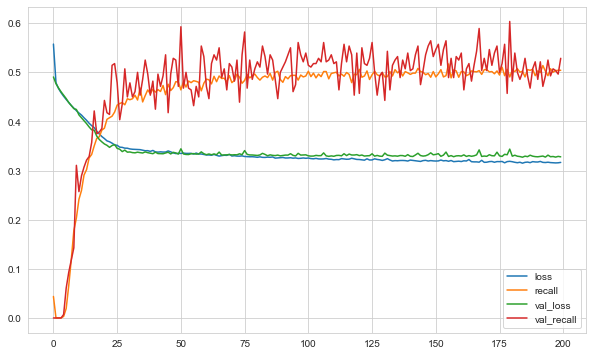

In [60]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [62]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[756  40]
 [123  81]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       796
           1       0.67      0.40      0.50       204

    accuracy                           0.84      1000
   macro avg       0.76      0.67      0.70      1000
weighted avg       0.82      0.84      0.82      1000



In [64]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve, average_precision_score


32/32 [==============================] - 0s 1ms/step


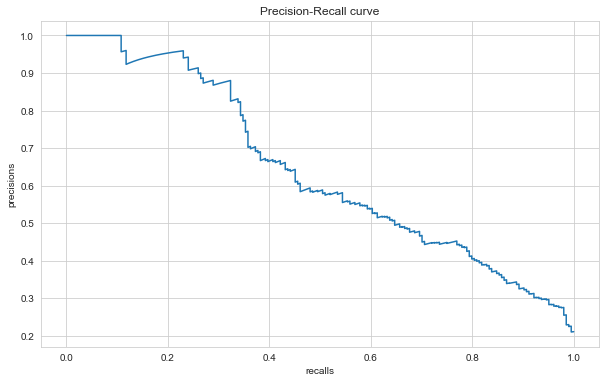

In [65]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()


In [48]:
model.fit(x = X_train, y = y_train, validation_split = 0.15, batch_size = 128, epochs =500)

Epoch 1/500
60/60 [==============================] - 0s 3ms/step - loss: 0.3155 - recall: 0.5106 - val_loss: 0.3290 - val_recall: 0.4643
Epoch 2/500
60/60 [==============================] - 0s 2ms/step - loss: 0.3164 - recall: 0.4958 - val_loss: 0.3277 - val_recall: 0.5000
Epoch 3/500
60/60 [==============================] - 0s 2ms/step - loss: 0.3159 - recall: 0.5093 - val_loss: 0.3295 - val_recall: 0.4929
Epoch 4/500
60/60 [==============================] - 0s 2ms/step - loss: 0.3164 - recall: 0.5080 - val_loss: 0.3298 - val_recall: 0.5214
Epoch 5/500
60/60 [==============================] - 0s 2ms/step - loss: 0.3153 - recall: 0.4990 - val_loss: 0.3302 - val_recall: 0.5321
Epoch 6/500
60/60 [==============================] - 0s 2ms/step - loss: 0.3154 - recall: 0.5029 - val_loss: 0.3304 - val_recall: 0.5321
Epoch 7/500
60/60 [==============================] - 0s 2ms/step - loss: 0.3150 - recall: 0.5010 - val_loss: 0.3301 - val_recall: 0.5571
Epoch 8/500
60/60 [======================

60/60 [==============================] - 0s 2ms/step - loss: 0.3128 - recall: 0.5093 - val_loss: 0.3321 - val_recall: 0.5464
Epoch 61/500
60/60 [==============================] - 0s 2ms/step - loss: 0.3121 - recall: 0.5171 - val_loss: 0.3296 - val_recall: 0.4821
Epoch 62/500
60/60 [==============================] - 0s 2ms/step - loss: 0.3126 - recall: 0.5145 - val_loss: 0.3305 - val_recall: 0.4821
Epoch 63/500
60/60 [==============================] - 0s 2ms/step - loss: 0.3119 - recall: 0.5087 - val_loss: 0.3322 - val_recall: 0.5429
Epoch 64/500
60/60 [==============================] - 0s 2ms/step - loss: 0.3141 - recall: 0.5229 - val_loss: 0.3319 - val_recall: 0.5357
Epoch 65/500
60/60 [==============================] - 0s 2ms/step - loss: 0.3123 - recall: 0.5080 - val_loss: 0.3329 - val_recall: 0.5464
Epoch 66/500
60/60 [==============================] - 0s 2ms/step - loss: 0.3112 - recall: 0.5248 - val_loss: 0.3344 - val_recall: 0.5393
Epoch 67/500
60/60 [===========================

60/60 [==============================] - 0s 2ms/step - loss: 0.3105 - recall: 0.5171 - val_loss: 0.3384 - val_recall: 0.4679
Epoch 120/500
60/60 [==============================] - 0s 2ms/step - loss: 0.3106 - recall: 0.5171 - val_loss: 0.3344 - val_recall: 0.5250
Epoch 121/500
60/60 [==============================] - 0s 2ms/step - loss: 0.3096 - recall: 0.5267 - val_loss: 0.3324 - val_recall: 0.4786
Epoch 122/500
60/60 [==============================] - 0s 2ms/step - loss: 0.3095 - recall: 0.5203 - val_loss: 0.3330 - val_recall: 0.5071
Epoch 123/500
60/60 [==============================] - 0s 2ms/step - loss: 0.3083 - recall: 0.5222 - val_loss: 0.3324 - val_recall: 0.5000
Epoch 124/500
60/60 [==============================] - 0s 2ms/step - loss: 0.3137 - recall: 0.5177 - val_loss: 0.3328 - val_recall: 0.5000
Epoch 125/500
60/60 [==============================] - 0s 2ms/step - loss: 0.3092 - recall: 0.5074 - val_loss: 0.3353 - val_recall: 0.5321
Epoch 126/500
60/60 [====================

60/60 [==============================] - 0s 2ms/step - loss: 0.3062 - recall: 0.5196 - val_loss: 0.3403 - val_recall: 0.5429
Epoch 179/500
60/60 [==============================] - 0s 2ms/step - loss: 0.3083 - recall: 0.5287 - val_loss: 0.3385 - val_recall: 0.4500
Epoch 180/500
60/60 [==============================] - 0s 2ms/step - loss: 0.3088 - recall: 0.5093 - val_loss: 0.3475 - val_recall: 0.5893
Epoch 181/500
60/60 [==============================] - 0s 2ms/step - loss: 0.3086 - recall: 0.5229 - val_loss: 0.3345 - val_recall: 0.4786
Epoch 182/500
60/60 [==============================] - 0s 2ms/step - loss: 0.3074 - recall: 0.5254 - val_loss: 0.3349 - val_recall: 0.5250
Epoch 183/500
60/60 [==============================] - 0s 2ms/step - loss: 0.3066 - recall: 0.5267 - val_loss: 0.3359 - val_recall: 0.5143
Epoch 184/500
60/60 [==============================] - 0s 2ms/step - loss: 0.3075 - recall: 0.5229 - val_loss: 0.3339 - val_recall: 0.4893
Epoch 185/500
60/60 [====================

60/60 [==============================] - 0s 2ms/step - loss: 0.3058 - recall: 0.5190 - val_loss: 0.3352 - val_recall: 0.5143
Epoch 238/500
60/60 [==============================] - 0s 2ms/step - loss: 0.3070 - recall: 0.5209 - val_loss: 0.3424 - val_recall: 0.5714
Epoch 239/500
60/60 [==============================] - 0s 2ms/step - loss: 0.3056 - recall: 0.5332 - val_loss: 0.3344 - val_recall: 0.5143
Epoch 240/500
60/60 [==============================] - 0s 2ms/step - loss: 0.3049 - recall: 0.5254 - val_loss: 0.3368 - val_recall: 0.5357
Epoch 241/500
60/60 [==============================] - 0s 2ms/step - loss: 0.3044 - recall: 0.5158 - val_loss: 0.3387 - val_recall: 0.5357
Epoch 242/500
60/60 [==============================] - 0s 2ms/step - loss: 0.3050 - recall: 0.5203 - val_loss: 0.3362 - val_recall: 0.5143
Epoch 243/500
60/60 [==============================] - 0s 2ms/step - loss: 0.3047 - recall: 0.5254 - val_loss: 0.3374 - val_recall: 0.5107
Epoch 244/500
60/60 [====================

60/60 [==============================] - 0s 2ms/step - loss: 0.3030 - recall: 0.5229 - val_loss: 0.3383 - val_recall: 0.5250
Epoch 297/500
60/60 [==============================] - 0s 2ms/step - loss: 0.3040 - recall: 0.5293 - val_loss: 0.3384 - val_recall: 0.4857
Epoch 298/500
60/60 [==============================] - 0s 2ms/step - loss: 0.3048 - recall: 0.5216 - val_loss: 0.3374 - val_recall: 0.5143
Epoch 299/500
60/60 [==============================] - 0s 2ms/step - loss: 0.3039 - recall: 0.5274 - val_loss: 0.3366 - val_recall: 0.4964
Epoch 300/500
60/60 [==============================] - 0s 2ms/step - loss: 0.3085 - recall: 0.5138 - val_loss: 0.3445 - val_recall: 0.5536
Epoch 301/500
60/60 [==============================] - 0s 2ms/step - loss: 0.3038 - recall: 0.5261 - val_loss: 0.3422 - val_recall: 0.5464
Epoch 302/500
60/60 [==============================] - 0s 2ms/step - loss: 0.3034 - recall: 0.5299 - val_loss: 0.3365 - val_recall: 0.5250
Epoch 303/500
60/60 [====================

60/60 [==============================] - 0s 2ms/step - loss: 0.3013 - recall: 0.5312 - val_loss: 0.3427 - val_recall: 0.5286
Epoch 356/500
60/60 [==============================] - 0s 2ms/step - loss: 0.3024 - recall: 0.5196 - val_loss: 0.3498 - val_recall: 0.5821
Epoch 357/500
60/60 [==============================] - 0s 2ms/step - loss: 0.3014 - recall: 0.5415 - val_loss: 0.3415 - val_recall: 0.5179
Epoch 358/500
60/60 [==============================] - 0s 2ms/step - loss: 0.3017 - recall: 0.5332 - val_loss: 0.3415 - val_recall: 0.5321
Epoch 359/500
60/60 [==============================] - 0s 2ms/step - loss: 0.3027 - recall: 0.5267 - val_loss: 0.3468 - val_recall: 0.5464
Epoch 360/500
60/60 [==============================] - 0s 2ms/step - loss: 0.3050 - recall: 0.5306 - val_loss: 0.3391 - val_recall: 0.4821
Epoch 361/500
60/60 [==============================] - 0s 2ms/step - loss: 0.3014 - recall: 0.5370 - val_loss: 0.3389 - val_recall: 0.4893
Epoch 362/500
60/60 [====================

60/60 [==============================] - 0s 2ms/step - loss: 0.3019 - recall: 0.5344 - val_loss: 0.3553 - val_recall: 0.5714
Epoch 415/500
60/60 [==============================] - 0s 2ms/step - loss: 0.3028 - recall: 0.5325 - val_loss: 0.3416 - val_recall: 0.5071
Epoch 416/500
60/60 [==============================] - 0s 2ms/step - loss: 0.3007 - recall: 0.5402 - val_loss: 0.3419 - val_recall: 0.5214
Epoch 417/500
60/60 [==============================] - 0s 2ms/step - loss: 0.3002 - recall: 0.5344 - val_loss: 0.3488 - val_recall: 0.5500
Epoch 418/500
60/60 [==============================] - 0s 2ms/step - loss: 0.3006 - recall: 0.5377 - val_loss: 0.3447 - val_recall: 0.5179
Epoch 419/500
60/60 [==============================] - 0s 2ms/step - loss: 0.3006 - recall: 0.5280 - val_loss: 0.3445 - val_recall: 0.5321
Epoch 420/500
60/60 [==============================] - 0s 2ms/step - loss: 0.2999 - recall: 0.5390 - val_loss: 0.3478 - val_recall: 0.5357
Epoch 421/500
60/60 [====================

60/60 [==============================] - 0s 2ms/step - loss: 0.2995 - recall: 0.5332 - val_loss: 0.3443 - val_recall: 0.4857
Epoch 474/500
60/60 [==============================] - 0s 2ms/step - loss: 0.2979 - recall: 0.5415 - val_loss: 0.3463 - val_recall: 0.5214
Epoch 475/500
60/60 [==============================] - 0s 2ms/step - loss: 0.2977 - recall: 0.5409 - val_loss: 0.3453 - val_recall: 0.5036
Epoch 476/500
60/60 [==============================] - 0s 2ms/step - loss: 0.2990 - recall: 0.5396 - val_loss: 0.3443 - val_recall: 0.5107
Epoch 477/500
60/60 [==============================] - 0s 2ms/step - loss: 0.2988 - recall: 0.5435 - val_loss: 0.3449 - val_recall: 0.5107
Epoch 478/500
60/60 [==============================] - 0s 2ms/step - loss: 0.2977 - recall: 0.5409 - val_loss: 0.3475 - val_recall: 0.5107
Epoch 479/500
60/60 [==============================] - 0s 2ms/step - loss: 0.2997 - recall: 0.5325 - val_loss: 0.3485 - val_recall: 0.5357
Epoch 480/500
60/60 [====================

In [47]:
pd.DataFrame(model.history.history)

,loss,recall,val_loss,val_recall
0,0.558,0.044,0.491,0.000
1,0.479,0.000,0.477,0.000
2,0.467,0.000,0.468,0.000
3,0.459,0.000,0.460,0.000
4,0.451,0.003,0.453,0.007
...,...,...,...,...
195,0.316,0.507,0.328,0.493
196,0.316,0.500,0.329,0.507
197,0.316,0.504,0.327,0.504
198,0.316,0.504,0.329,0.496


<AxesSubplot:>

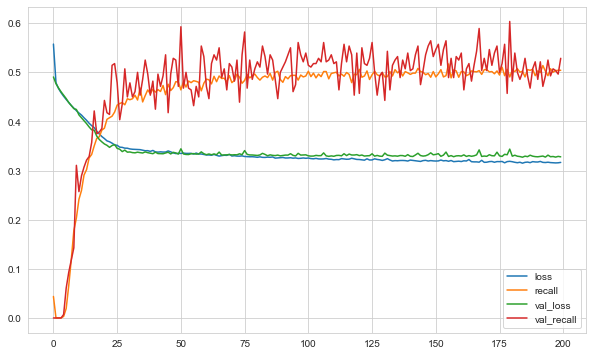

In [46]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

In [55]:
df['Exited'].value_counts(normalize=True)

0   0.796
1   0.204
Name: Exited, dtype: float64

In [66]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)
class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights


{0: 0.6278777731268314, 1: 2.454991816693944}

### Create The Model

In [72]:
tf.random.set_seed(seed)

model = Sequential()
model.add(Dense(20, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(5, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
opt =Adam(lr=0.001)
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics=['Recall']) 

In [73]:
model.fit(x = X_train, y = y_train, validation_split = 0.15, batch_size = 128, epochs = 500, class_weight= class_weights)

Epoch 1/500
60/60 [==============================] - 1s 7ms/step - loss: 0.6735 - recall: 0.4778 - val_loss: 0.6095 - val_recall: 0.5179
Epoch 2/500
60/60 [==============================] - 0s 3ms/step - loss: 0.6528 - recall: 0.5480 - val_loss: 0.6230 - val_recall: 0.6357
Epoch 3/500
60/60 [==============================] - 0s 3ms/step - loss: 0.6324 - recall: 0.6169 - val_loss: 0.6160 - val_recall: 0.6607
Epoch 4/500
60/60 [==============================] - 0s 3ms/step - loss: 0.6154 - recall: 0.6291 - val_loss: 0.6158 - val_recall: 0.6821
Epoch 5/500
60/60 [==============================] - 0s 3ms/step - loss: 0.6011 - recall: 0.6555 - val_loss: 0.6121 - val_recall: 0.7143
Epoch 6/500
60/60 [==============================] - 0s 2ms/step - loss: 0.5868 - recall: 0.6671 - val_loss: 0.6279 - val_recall: 0.7786
Epoch 7/500
60/60 [==============================] - 0s 2ms/step - loss: 0.5769 - recall: 0.6851 - val_loss: 0.5588 - val_recall: 0.6714
Epoch 8/500
60/60 [======================

60/60 [==============================] - 0s 2ms/step - loss: 0.4537 - recall: 0.7759 - val_loss: 0.5110 - val_recall: 0.8357
Epoch 61/500
60/60 [==============================] - 0s 3ms/step - loss: 0.4521 - recall: 0.7637 - val_loss: 0.4470 - val_recall: 0.7821
Epoch 62/500
60/60 [==============================] - 0s 3ms/step - loss: 0.4525 - recall: 0.7656 - val_loss: 0.4258 - val_recall: 0.7286
Epoch 63/500
60/60 [==============================] - 0s 2ms/step - loss: 0.4524 - recall: 0.7605 - val_loss: 0.4620 - val_recall: 0.7964
Epoch 64/500
60/60 [==============================] - 0s 2ms/step - loss: 0.4553 - recall: 0.7611 - val_loss: 0.4900 - val_recall: 0.8286
Epoch 65/500
60/60 [==============================] - 0s 3ms/step - loss: 0.4526 - recall: 0.7669 - val_loss: 0.4643 - val_recall: 0.7821
Epoch 66/500
60/60 [==============================] - 0s 3ms/step - loss: 0.4502 - recall: 0.7740 - val_loss: 0.5025 - val_recall: 0.8286
Epoch 67/500
60/60 [===========================

60/60 [==============================] - 0s 2ms/step - loss: 0.4423 - recall: 0.7701 - val_loss: 0.4093 - val_recall: 0.7357
Epoch 120/500
60/60 [==============================] - 0s 2ms/step - loss: 0.4404 - recall: 0.7708 - val_loss: 0.4777 - val_recall: 0.8179
Epoch 121/500
60/60 [==============================] - 0s 2ms/step - loss: 0.4402 - recall: 0.7766 - val_loss: 0.4343 - val_recall: 0.7714
Epoch 122/500
60/60 [==============================] - 0s 2ms/step - loss: 0.4393 - recall: 0.7708 - val_loss: 0.4843 - val_recall: 0.8179
Epoch 123/500
60/60 [==============================] - 0s 2ms/step - loss: 0.4387 - recall: 0.7688 - val_loss: 0.4528 - val_recall: 0.8071
Epoch 124/500
60/60 [==============================] - 0s 2ms/step - loss: 0.4429 - recall: 0.7630 - val_loss: 0.4234 - val_recall: 0.7679
Epoch 125/500
60/60 [==============================] - 0s 3ms/step - loss: 0.4395 - recall: 0.7611 - val_loss: 0.4684 - val_recall: 0.8071
Epoch 126/500
60/60 [====================

60/60 [==============================] - 0s 3ms/step - loss: 0.4312 - recall: 0.7637 - val_loss: 0.5112 - val_recall: 0.8357
Epoch 179/500
60/60 [==============================] - 0s 3ms/step - loss: 0.4356 - recall: 0.7778 - val_loss: 0.4083 - val_recall: 0.7250
Epoch 180/500
60/60 [==============================] - 0s 3ms/step - loss: 0.4352 - recall: 0.7618 - val_loss: 0.5437 - val_recall: 0.8464
Epoch 181/500
60/60 [==============================] - 0s 2ms/step - loss: 0.4350 - recall: 0.7727 - val_loss: 0.4622 - val_recall: 0.8000
Epoch 182/500
60/60 [==============================] - 0s 3ms/step - loss: 0.4324 - recall: 0.7688 - val_loss: 0.4762 - val_recall: 0.8179
Epoch 183/500
60/60 [==============================] - 0s 3ms/step - loss: 0.4310 - recall: 0.7753 - val_loss: 0.4362 - val_recall: 0.7643
Epoch 184/500
60/60 [==============================] - 0s 3ms/step - loss: 0.4326 - recall: 0.7701 - val_loss: 0.4395 - val_recall: 0.7679
Epoch 185/500
60/60 [====================

60/60 [==============================] - 0s 3ms/step - loss: 0.4269 - recall: 0.7721 - val_loss: 0.4568 - val_recall: 0.7821
Epoch 238/500
60/60 [==============================] - 0s 2ms/step - loss: 0.4308 - recall: 0.7675 - val_loss: 0.5187 - val_recall: 0.8214
Epoch 239/500
60/60 [==============================] - 0s 3ms/step - loss: 0.4293 - recall: 0.7836 - val_loss: 0.4555 - val_recall: 0.7964
Epoch 240/500
60/60 [==============================] - 0s 2ms/step - loss: 0.4264 - recall: 0.7733 - val_loss: 0.4705 - val_recall: 0.8071
Epoch 241/500
60/60 [==============================] - 0s 2ms/step - loss: 0.4273 - recall: 0.7605 - val_loss: 0.4821 - val_recall: 0.8071
Epoch 242/500
60/60 [==============================] - 0s 2ms/step - loss: 0.4282 - recall: 0.7811 - val_loss: 0.4360 - val_recall: 0.7571
Epoch 243/500
60/60 [==============================] - 0s 2ms/step - loss: 0.4252 - recall: 0.7766 - val_loss: 0.4439 - val_recall: 0.7679
Epoch 244/500
60/60 [====================

60/60 [==============================] - 0s 2ms/step - loss: 0.4245 - recall: 0.7740 - val_loss: 0.4630 - val_recall: 0.7750
Epoch 297/500
60/60 [==============================] - 0s 2ms/step - loss: 0.4226 - recall: 0.7785 - val_loss: 0.4524 - val_recall: 0.7679
Epoch 298/500
60/60 [==============================] - 0s 2ms/step - loss: 0.4253 - recall: 0.7669 - val_loss: 0.4587 - val_recall: 0.7821
Epoch 299/500
60/60 [==============================] - 0s 2ms/step - loss: 0.4237 - recall: 0.7804 - val_loss: 0.4525 - val_recall: 0.7643
Epoch 300/500
60/60 [==============================] - 0s 2ms/step - loss: 0.4285 - recall: 0.7759 - val_loss: 0.5005 - val_recall: 0.8071
Epoch 301/500
60/60 [==============================] - 0s 2ms/step - loss: 0.4215 - recall: 0.7753 - val_loss: 0.4715 - val_recall: 0.7857
Epoch 302/500
60/60 [==============================] - 0s 3ms/step - loss: 0.4202 - recall: 0.7791 - val_loss: 0.4776 - val_recall: 0.7964
Epoch 303/500
60/60 [====================

60/60 [==============================] - 0s 2ms/step - loss: 0.4190 - recall: 0.7778 - val_loss: 0.4613 - val_recall: 0.7821
Epoch 356/500
60/60 [==============================] - 0s 2ms/step - loss: 0.4182 - recall: 0.7740 - val_loss: 0.5375 - val_recall: 0.8179
Epoch 357/500
60/60 [==============================] - 0s 2ms/step - loss: 0.4192 - recall: 0.7875 - val_loss: 0.4390 - val_recall: 0.7714
Epoch 358/500
60/60 [==============================] - 0s 2ms/step - loss: 0.4197 - recall: 0.7817 - val_loss: 0.4819 - val_recall: 0.7893
Epoch 359/500
60/60 [==============================] - 0s 3ms/step - loss: 0.4197 - recall: 0.7746 - val_loss: 0.4532 - val_recall: 0.7679
Epoch 360/500
60/60 [==============================] - 0s 2ms/step - loss: 0.4227 - recall: 0.7811 - val_loss: 0.4308 - val_recall: 0.7429
Epoch 361/500
60/60 [==============================] - 0s 2ms/step - loss: 0.4175 - recall: 0.7817 - val_loss: 0.4506 - val_recall: 0.7607
Epoch 362/500
60/60 [====================

60/60 [==============================] - 0s 3ms/step - loss: 0.4160 - recall: 0.7856 - val_loss: 0.4897 - val_recall: 0.8000
Epoch 415/500
60/60 [==============================] - 0s 3ms/step - loss: 0.4173 - recall: 0.7952 - val_loss: 0.4715 - val_recall: 0.7821
Epoch 416/500
60/60 [==============================] - 0s 3ms/step - loss: 0.4153 - recall: 0.7824 - val_loss: 0.4713 - val_recall: 0.7893
Epoch 417/500
60/60 [==============================] - 0s 3ms/step - loss: 0.4152 - recall: 0.7856 - val_loss: 0.5025 - val_recall: 0.8107
Epoch 418/500
60/60 [==============================] - 0s 3ms/step - loss: 0.4184 - recall: 0.7746 - val_loss: 0.5318 - val_recall: 0.8179
Epoch 419/500
60/60 [==============================] - 0s 3ms/step - loss: 0.4183 - recall: 0.7869 - val_loss: 0.5044 - val_recall: 0.8036
Epoch 420/500
60/60 [==============================] - 0s 3ms/step - loss: 0.4151 - recall: 0.7849 - val_loss: 0.4943 - val_recall: 0.7893
Epoch 421/500
60/60 [====================

60/60 [==============================] - 0s 2ms/step - loss: 0.4158 - recall: 0.7933 - val_loss: 0.4531 - val_recall: 0.7571
Epoch 474/500
60/60 [==============================] - 0s 3ms/step - loss: 0.4149 - recall: 0.7798 - val_loss: 0.4739 - val_recall: 0.7857
Epoch 475/500
60/60 [==============================] - 0s 2ms/step - loss: 0.4135 - recall: 0.7824 - val_loss: 0.4555 - val_recall: 0.7750
Epoch 476/500
60/60 [==============================] - 0s 3ms/step - loss: 0.4132 - recall: 0.7836 - val_loss: 0.4560 - val_recall: 0.7750
Epoch 477/500
60/60 [==============================] - 0s 2ms/step - loss: 0.4139 - recall: 0.7888 - val_loss: 0.4572 - val_recall: 0.7643
Epoch 478/500
60/60 [==============================] - 0s 3ms/step - loss: 0.4128 - recall: 0.7804 - val_loss: 0.4325 - val_recall: 0.7357
Epoch 479/500
60/60 [==============================] - 0s 2ms/step - loss: 0.4138 - recall: 0.7875 - val_loss: 0.4670 - val_recall: 0.7607
Epoch 480/500
60/60 [====================

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [74]:
pd.DataFrame(model.history.history)

,loss,recall,val_loss,val_recall
0,0.674,0.478,0.610,0.518
1,0.653,0.548,0.623,0.636
2,0.632,0.617,0.616,0.661
3,0.615,0.629,0.616,0.682
4,0.601,0.656,0.612,0.714
...,...,...,...,...
495,0.415,0.788,0.449,0.754
496,0.412,0.780,0.504,0.800
497,0.419,0.779,0.435,0.746
498,0.416,0.794,0.433,0.754


<AxesSubplot:>

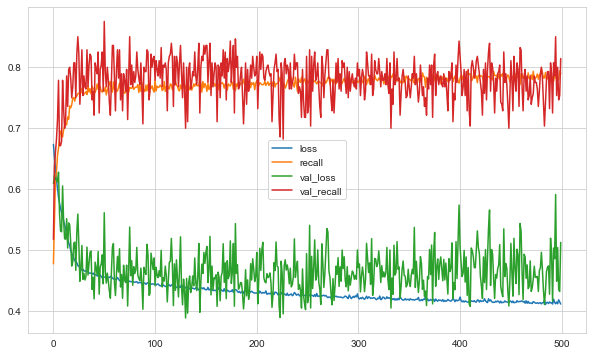

In [75]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [76]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[577 219]
 [ 49 155]]
              precision    recall  f1-score   support

           0       0.92      0.72      0.81       796
           1       0.41      0.76      0.54       204

    accuracy                           0.73      1000
   macro avg       0.67      0.74      0.67      1000
weighted avg       0.82      0.73      0.76      1000



32/32 [==============================] - 0s 2ms/step


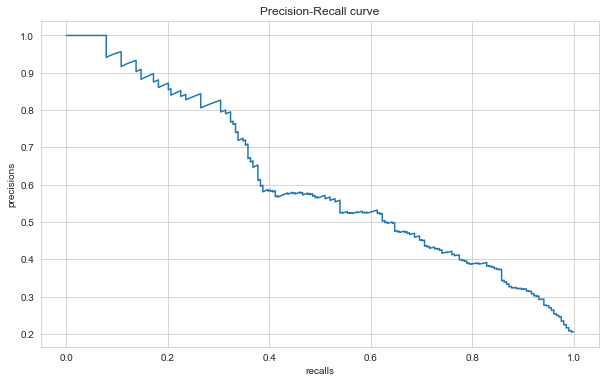

In [77]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

In [82]:
tf.random.set_seed(seed)

model = Sequential()
model.add(Dense(20, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(5, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
opt =Adam(lr=0.003)
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics=['Recall']) 

In [83]:
model.fit(x = X_train, y = y_train, validation_split = 0.15, batch_size = 128, epochs = 300, class_weight= class_weights)

Epoch 1/300
60/60 [==============================] - 1s 7ms/step - loss: 0.6589 - recall: 0.5428 - val_loss: 0.6004 - val_recall: 0.6071
Epoch 2/300
60/60 [==============================] - 0s 3ms/step - loss: 0.6132 - recall: 0.6484 - val_loss: 0.6271 - val_recall: 0.7393
Epoch 3/300
60/60 [==============================] - 0s 3ms/step - loss: 0.5886 - recall: 0.6813 - val_loss: 0.5241 - val_recall: 0.6107
Epoch 4/300
60/60 [==============================] - 0s 3ms/step - loss: 0.5638 - recall: 0.6929 - val_loss: 0.5720 - val_recall: 0.7500
Epoch 5/300
60/60 [==============================] - 0s 2ms/step - loss: 0.5420 - recall: 0.7019 - val_loss: 0.5572 - val_recall: 0.7643
Epoch 6/300
60/60 [==============================] - 0s 3ms/step - loss: 0.5252 - recall: 0.7199 - val_loss: 0.5589 - val_recall: 0.8107
Epoch 7/300
60/60 [==============================] - 0s 3ms/step - loss: 0.5056 - recall: 0.7354 - val_loss: 0.5488 - val_recall: 0.8357
Epoch 8/300
60/60 [======================

60/60 [==============================] - 0s 3ms/step - loss: 0.4383 - recall: 0.7695 - val_loss: 0.4519 - val_recall: 0.7893
Epoch 61/300
60/60 [==============================] - 0s 3ms/step - loss: 0.4383 - recall: 0.7637 - val_loss: 0.4811 - val_recall: 0.8036
Epoch 62/300
60/60 [==============================] - 0s 3ms/step - loss: 0.4408 - recall: 0.7663 - val_loss: 0.4003 - val_recall: 0.7000
Epoch 63/300
60/60 [==============================] - 0s 3ms/step - loss: 0.4389 - recall: 0.7605 - val_loss: 0.4879 - val_recall: 0.8036
Epoch 64/300
60/60 [==============================] - 0s 3ms/step - loss: 0.4399 - recall: 0.7618 - val_loss: 0.4664 - val_recall: 0.8000
Epoch 65/300
60/60 [==============================] - 0s 2ms/step - loss: 0.4378 - recall: 0.7682 - val_loss: 0.5136 - val_recall: 0.8214
Epoch 66/300
60/60 [==============================] - 0s 3ms/step - loss: 0.4357 - recall: 0.7688 - val_loss: 0.4988 - val_recall: 0.8071
Epoch 67/300
60/60 [===========================

60/60 [==============================] - 0s 2ms/step - loss: 0.4246 - recall: 0.7817 - val_loss: 0.4320 - val_recall: 0.7714
Epoch 120/300
60/60 [==============================] - 0s 2ms/step - loss: 0.4263 - recall: 0.7701 - val_loss: 0.5157 - val_recall: 0.8286
Epoch 121/300
60/60 [==============================] - 0s 2ms/step - loss: 0.4256 - recall: 0.7727 - val_loss: 0.4410 - val_recall: 0.7679
Epoch 122/300
60/60 [==============================] - 0s 3ms/step - loss: 0.4220 - recall: 0.7843 - val_loss: 0.4800 - val_recall: 0.8000
Epoch 123/300
60/60 [==============================] - 0s 3ms/step - loss: 0.4228 - recall: 0.7869 - val_loss: 0.4638 - val_recall: 0.8000
Epoch 124/300
60/60 [==============================] - 0s 2ms/step - loss: 0.4279 - recall: 0.7733 - val_loss: 0.4047 - val_recall: 0.7393
Epoch 125/300
60/60 [==============================] - 0s 3ms/step - loss: 0.4209 - recall: 0.7791 - val_loss: 0.4649 - val_recall: 0.7857
Epoch 126/300
60/60 [====================

60/60 [==============================] - 0s 3ms/step - loss: 0.4117 - recall: 0.7978 - val_loss: 0.5492 - val_recall: 0.8357
Epoch 179/300
60/60 [==============================] - 0s 3ms/step - loss: 0.4174 - recall: 0.7952 - val_loss: 0.3993 - val_recall: 0.7000
Epoch 180/300
60/60 [==============================] - 0s 3ms/step - loss: 0.4156 - recall: 0.7946 - val_loss: 0.5491 - val_recall: 0.8429
Epoch 181/300
60/60 [==============================] - 0s 3ms/step - loss: 0.4171 - recall: 0.7985 - val_loss: 0.4608 - val_recall: 0.7893
Epoch 182/300
60/60 [==============================] - 0s 2ms/step - loss: 0.4146 - recall: 0.7985 - val_loss: 0.5213 - val_recall: 0.8179
Epoch 183/300
60/60 [==============================] - 0s 2ms/step - loss: 0.4136 - recall: 0.7952 - val_loss: 0.4439 - val_recall: 0.7500
Epoch 184/300
60/60 [==============================] - 0s 2ms/step - loss: 0.4138 - recall: 0.7894 - val_loss: 0.4584 - val_recall: 0.7714
Epoch 185/300
60/60 [====================

60/60 [==============================] - 0s 3ms/step - loss: 0.4063 - recall: 0.7952 - val_loss: 0.4696 - val_recall: 0.7964
Epoch 238/300
60/60 [==============================] - 0s 3ms/step - loss: 0.4106 - recall: 0.7952 - val_loss: 0.5914 - val_recall: 0.8429
Epoch 239/300
60/60 [==============================] - 0s 2ms/step - loss: 0.4116 - recall: 0.8030 - val_loss: 0.5191 - val_recall: 0.8214
Epoch 240/300
60/60 [==============================] - 0s 3ms/step - loss: 0.4066 - recall: 0.8062 - val_loss: 0.4938 - val_recall: 0.8036
Epoch 241/300
60/60 [==============================] - 0s 3ms/step - loss: 0.4018 - recall: 0.8023 - val_loss: 0.4985 - val_recall: 0.7964
Epoch 242/300
60/60 [==============================] - 0s 3ms/step - loss: 0.4068 - recall: 0.7985 - val_loss: 0.4603 - val_recall: 0.7714
Epoch 243/300
60/60 [==============================] - 0s 3ms/step - loss: 0.4046 - recall: 0.8094 - val_loss: 0.4496 - val_recall: 0.7643
Epoch 244/300
60/60 [====================

60/60 [==============================] - 0s 2ms/step - loss: 0.3985 - recall: 0.8023 - val_loss: 0.4807 - val_recall: 0.7857
Epoch 297/300
60/60 [==============================] - 0s 2ms/step - loss: 0.4017 - recall: 0.8107 - val_loss: 0.4583 - val_recall: 0.7536
Epoch 298/300
60/60 [==============================] - 0s 3ms/step - loss: 0.4026 - recall: 0.7965 - val_loss: 0.4885 - val_recall: 0.7893
Epoch 299/300
60/60 [==============================] - 0s 3ms/step - loss: 0.3996 - recall: 0.8042 - val_loss: 0.4465 - val_recall: 0.7714
Epoch 300/300
60/60 [==============================] - 0s 3ms/step - loss: 0.4019 - recall: 0.8017 - val_loss: 0.5161 - val_recall: 0.7929


<AxesSubplot:>

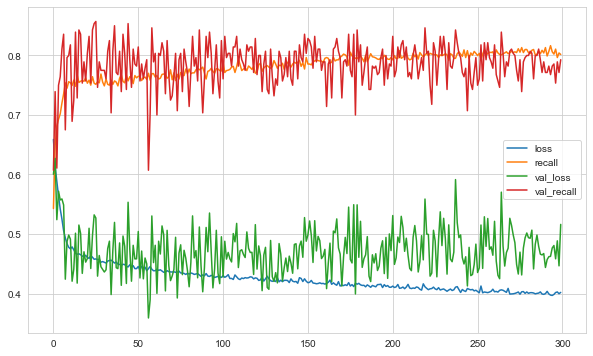

In [84]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

### Add Dropout Layer

In [86]:
from tensorflow.keras.layers import Dropout

In [100]:
tf.random.set_seed(seed)

model = Sequential()
model.add(Dense(20, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(5, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid'))
opt =Adam(lr=0.01)
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics=['Recall']) 




In [101]:
model.fit(x = X_train, y = y_train, validation_split = 0.15, batch_size = 128, epochs = 200, class_weight= class_weights)

Epoch 1/200
60/60 [==============================] - 2s 9ms/step - loss: 0.6798 - recall: 0.5956 - val_loss: 0.6155 - val_recall: 0.5929
Epoch 2/200
60/60 [==============================] - 0s 4ms/step - loss: 0.6480 - recall: 0.6665 - val_loss: 0.6365 - val_recall: 0.7143
Epoch 3/200
60/60 [==============================] - 0s 4ms/step - loss: 0.6205 - recall: 0.7012 - val_loss: 0.5905 - val_recall: 0.7286
Epoch 4/200
60/60 [==============================] - 0s 3ms/step - loss: 0.6019 - recall: 0.6703 - val_loss: 0.5934 - val_recall: 0.7786
Epoch 5/200
60/60 [==============================] - 0s 3ms/step - loss: 0.5756 - recall: 0.6980 - val_loss: 0.5402 - val_recall: 0.7321
Epoch 6/200
60/60 [==============================] - 0s 3ms/step - loss: 0.5698 - recall: 0.6974 - val_loss: 0.5490 - val_recall: 0.8071
Epoch 7/200
60/60 [==============================] - 0s 3ms/step - loss: 0.5566 - recall: 0.6819 - val_loss: 0.5356 - val_recall: 0.8071
Epoch 8/200
60/60 [======================

60/60 [==============================] - 0s 3ms/step - loss: 0.5109 - recall: 0.7502 - val_loss: 0.5044 - val_recall: 0.8536
Epoch 61/200
60/60 [==============================] - 0s 2ms/step - loss: 0.5130 - recall: 0.7077 - val_loss: 0.4657 - val_recall: 0.8286
Epoch 62/200
60/60 [==============================] - 0s 3ms/step - loss: 0.5130 - recall: 0.7135 - val_loss: 0.4677 - val_recall: 0.8143
Epoch 63/200
60/60 [==============================] - 0s 3ms/step - loss: 0.5117 - recall: 0.7141 - val_loss: 0.4387 - val_recall: 0.7929
Epoch 64/200
60/60 [==============================] - 0s 3ms/step - loss: 0.5189 - recall: 0.6922 - val_loss: 0.4471 - val_recall: 0.8143
Epoch 65/200
60/60 [==============================] - 0s 4ms/step - loss: 0.5159 - recall: 0.7238 - val_loss: 0.4305 - val_recall: 0.8179
Epoch 66/200
60/60 [==============================] - 0s 4ms/step - loss: 0.5096 - recall: 0.7205 - val_loss: 0.5229 - val_recall: 0.8750
Epoch 67/200
60/60 [===========================

60/60 [==============================] - 0s 3ms/step - loss: 0.5099 - recall: 0.7244 - val_loss: 0.4334 - val_recall: 0.7750
Epoch 120/200
60/60 [==============================] - 0s 3ms/step - loss: 0.5055 - recall: 0.7250 - val_loss: 0.4809 - val_recall: 0.8179
Epoch 121/200
60/60 [==============================] - 0s 3ms/step - loss: 0.5099 - recall: 0.7399 - val_loss: 0.4860 - val_recall: 0.7929
Epoch 122/200
60/60 [==============================] - 0s 3ms/step - loss: 0.5140 - recall: 0.7257 - val_loss: 0.5316 - val_recall: 0.8036
Epoch 123/200
60/60 [==============================] - 0s 3ms/step - loss: 0.5113 - recall: 0.6948 - val_loss: 0.4448 - val_recall: 0.7607
Epoch 124/200
60/60 [==============================] - 0s 3ms/step - loss: 0.5108 - recall: 0.7128 - val_loss: 0.4639 - val_recall: 0.8214
Epoch 125/200
60/60 [==============================] - 0s 3ms/step - loss: 0.5090 - recall: 0.7289 - val_loss: 0.4538 - val_recall: 0.8000
Epoch 126/200
60/60 [====================

60/60 [==============================] - 0s 3ms/step - loss: 0.5034 - recall: 0.7199 - val_loss: 0.4898 - val_recall: 0.8250
Epoch 179/200
60/60 [==============================] - 0s 3ms/step - loss: 0.5049 - recall: 0.7270 - val_loss: 0.4500 - val_recall: 0.7893
Epoch 180/200
60/60 [==============================] - 0s 3ms/step - loss: 0.5045 - recall: 0.6954 - val_loss: 0.4639 - val_recall: 0.8036
Epoch 181/200
60/60 [==============================] - 0s 4ms/step - loss: 0.5079 - recall: 0.7360 - val_loss: 0.5012 - val_recall: 0.8250
Epoch 182/200
60/60 [==============================] - 0s 3ms/step - loss: 0.5028 - recall: 0.7186 - val_loss: 0.5012 - val_recall: 0.8536
Epoch 183/200
60/60 [==============================] - 0s 3ms/step - loss: 0.5057 - recall: 0.7489 - val_loss: 0.4736 - val_recall: 0.8286
Epoch 184/200
60/60 [==============================] - 0s 3ms/step - loss: 0.5068 - recall: 0.7135 - val_loss: 0.4644 - val_recall: 0.8393
Epoch 185/200
60/60 [====================

<AxesSubplot:>

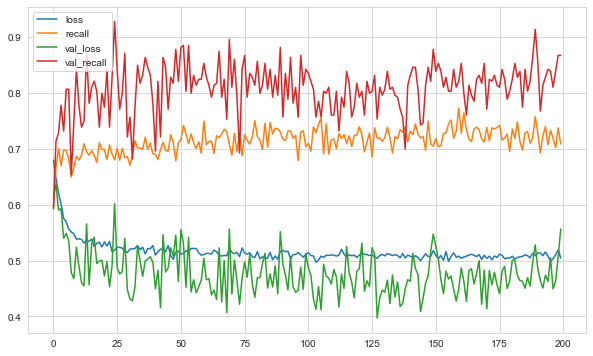

In [102]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [103]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[527 269]
 [ 30 174]]
              precision    recall  f1-score   support

           0       0.95      0.66      0.78       796
           1       0.39      0.85      0.54       204

    accuracy                           0.70      1000
   macro avg       0.67      0.76      0.66      1000
weighted avg       0.83      0.70      0.73      1000



### Add Early Stop

#### Monitor the "val_loss" as metric

In [105]:
tf.random.set_seed(seed)

model = Sequential()
model.add(Dense(20, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(5, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid'))
opt =Adam(lr=0.01)
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics=['Recall']) 


In [106]:
from tensorflow.keras.callbacks import EarlyStopping

In [107]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)


In [108]:
model.fit(x = X_train, y = y_train, validation_split = 0.15, batch_size = 128, epochs = 200, class_weight= class_weights,
          callbacks = [early_stop])

Epoch 1/200
60/60 [==============================] - 2s 10ms/step - loss: 0.6798 - recall: 0.5956 - val_loss: 0.6155 - val_recall: 0.5929
Epoch 2/200
60/60 [==============================] - 0s 3ms/step - loss: 0.6480 - recall: 0.6665 - val_loss: 0.6365 - val_recall: 0.7143
Epoch 3/200
60/60 [==============================] - 0s 4ms/step - loss: 0.6205 - recall: 0.7012 - val_loss: 0.5905 - val_recall: 0.7286
Epoch 4/200
60/60 [==============================] - 0s 4ms/step - loss: 0.6019 - recall: 0.6703 - val_loss: 0.5934 - val_recall: 0.7786
Epoch 5/200
60/60 [==============================] - 0s 3ms/step - loss: 0.5756 - recall: 0.6980 - val_loss: 0.5402 - val_recall: 0.7321
Epoch 6/200
60/60 [==============================] - 0s 4ms/step - loss: 0.5698 - recall: 0.6974 - val_loss: 0.5490 - val_recall: 0.8071
Epoch 7/200
60/60 [==============================] - 0s 4ms/step - loss: 0.5566 - recall: 0.6819 - val_loss: 0.5356 - val_recall: 0.8071
Epoch 8/200
60/60 [=====================

<AxesSubplot:>

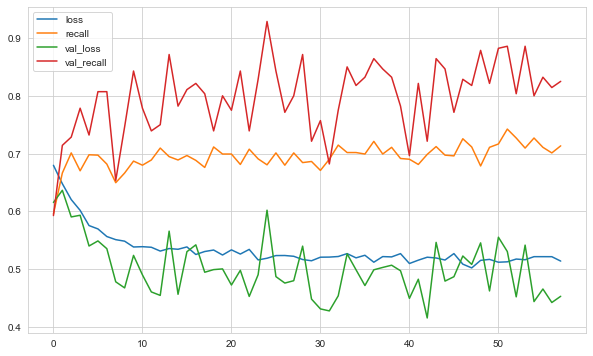

In [109]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [110]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[671 125]
 [ 70 134]]
              precision    recall  f1-score   support

           0       0.91      0.84      0.87       796
           1       0.52      0.66      0.58       204

    accuracy                           0.81      1000
   macro avg       0.71      0.75      0.73      1000
weighted avg       0.83      0.81      0.81      1000



#### Monitor the "val_recall" as metric

In [145]:
tf.random.set_seed(seed)

model = Sequential()
model.add(Dense(20, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dropout(0.1))
model.add(Dense(10, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(5, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation = 'sigmoid'))
opt =Adam(lr=0.005)
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics=['Recall']) 

In [146]:
early_stop = EarlyStopping(monitor = "val_recall", mode = "max", verbose = 1, patience = 30, restore_best_weights = True)


In [147]:
model.fit(x = X_train, y = y_train, validation_split = 0.15, batch_size = 128, epochs = 200, class_weight= class_weights,
          callbacks = [early_stop])

Epoch 1/200
60/60 [==============================] - 2s 7ms/step - loss: 0.6780 - recall: 0.4475 - val_loss: 0.5890 - val_recall: 0.5679
Epoch 2/200
60/60 [==============================] - 0s 3ms/step - loss: 0.6462 - recall: 0.6780 - val_loss: 0.6229 - val_recall: 0.6500
Epoch 3/200
60/60 [==============================] - 0s 3ms/step - loss: 0.6159 - recall: 0.6587 - val_loss: 0.5431 - val_recall: 0.5750
Epoch 4/200
60/60 [==============================] - 0s 3ms/step - loss: 0.5902 - recall: 0.6652 - val_loss: 0.5984 - val_recall: 0.7571
Epoch 5/200
60/60 [==============================] - 0s 3ms/step - loss: 0.5669 - recall: 0.7064 - val_loss: 0.5390 - val_recall: 0.7536
Epoch 6/200
60/60 [==============================] - 0s 3ms/step - loss: 0.5542 - recall: 0.7244 - val_loss: 0.5591 - val_recall: 0.8179
Epoch 7/200
60/60 [==============================] - 0s 3ms/step - loss: 0.5416 - recall: 0.7315 - val_loss: 0.5048 - val_recall: 0.7964
Epoch 8/200
60/60 [======================

<AxesSubplot:>

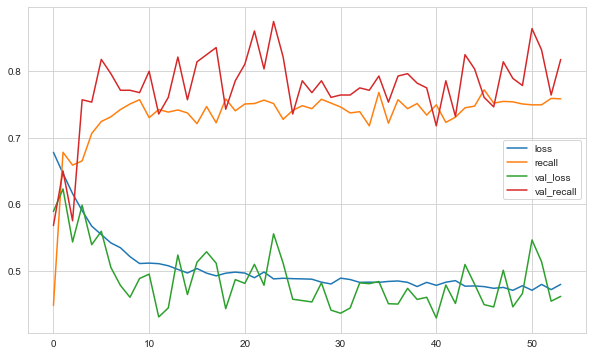

In [148]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [149]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[501 295]
 [ 35 169]]
              precision    recall  f1-score   support

           0       0.93      0.63      0.75       796
           1       0.36      0.83      0.51       204

    accuracy                           0.67      1000
   macro avg       0.65      0.73      0.63      1000
weighted avg       0.82      0.67      0.70      1000



## GridSearchCV

In [124]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam

In [150]:
def build_classifier(optimizer, learn_rate):
    tf.random.set_seed(1)
    classifier = Sequential()
    classifier.add(Dense(units = 32, activation = 'relu'))
    classifier.add(Dense(units = 16, activation = 'relu'))
    classifier.add(Dense(units = 8, activation = 'relu'))
    classifier.add(Dense(units = 4, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer(learn_rate), loss = 'binary_crossentropy', metrics = ['Recall'])
    return classifier


In [151]:
early_stop = EarlyStopping(monitor = "val_recall", mode = "max", verbose = 1, patience = 30, restore_best_weights = True)


In [ ]:
# model.fit(x = X_train, y = y_train, validation_split = 0.15, batch_size = 128, epochs = 200, class_weight= class_weights,
#          callbacks = [early_stop])

In [152]:
classifier_model = KerasClassifier(build_fn = build_classifier, validation_split = 0.1, epochs = 200)

parameters = {'batch_size': [32, 64 ,128],
              'optimizer': [Adam, RMSprop, Adadelta, Nadam],
              'learn_rate': [0.0005,0.001, 0.003, 0.005,0.01,0.1]}

grid_model = GridSearchCV(estimator = classifier_model,
                          param_grid = parameters,
                          scoring = 'recall',
                          cv = 10,
                          n_jobs = -1,
                          verbose = 1)

grid_model.fit(X_train, y_train, callbacks = [early_stop])

Fitting 10 folds for each of 72 candidates, totalling 720 fits
Epoch 1/200
64/64 [==============================] - 1s 5ms/step - loss: 1.0949 - recall: 0.0000e+00 - val_loss: 0.5151 - val_recall: 0.0000e+00
Epoch 2/200
64/64 [==============================] - 0s 2ms/step - loss: 0.5006 - recall: 0.0000e+00 - val_loss: 0.5294 - val_recall: 0.0000e+00
Epoch 3/200
64/64 [==============================] - 0s 2ms/step - loss: 0.4801 - recall: 0.0000e+00 - val_loss: 0.4628 - val_recall: 0.0000e+00
Epoch 4/200
64/64 [==============================] - 0s 2ms/step - loss: 0.4589 - recall: 0.0000e+00 - val_loss: 0.4771 - val_recall: 0.0000e+00
Epoch 5/200
64/64 [==============================] - 0s 2ms/step - loss: 0.4416 - recall: 0.0715 - val_loss: 0.5882 - val_recall: 0.0000e+00
Epoch 6/200
64/64 [==============================] - 0s 2ms/step - loss: 0.4380 - recall: 0.1167 - val_loss: 0.4089 - val_recall: 0.0000e+00
Epoch 7/200
64/64 [==============================] - 0s 2ms/step - loss: 0.

GridSearchCV(cv=10,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x000002D0ABA975B0>,
             n_jobs=-1,
             param_grid={'batch_size': [32, 64, 128],
                         'learn_rate': [0.0005, 0.001, 0.003, 0.005, 0.01, 0.1],
                         'optimizer': [<class 'keras.optimizers.optimizer_v2.adam.Adam'>,
                                       <class 'keras.optimizers.optimizer_v2.rmsprop.RMSprop'>,
                                       <class 'keras.optimizers.optimizer_v2.adadelta.Adadelta'>,
                                       <class 'keras.optimizers.optimizer_v2.nadam.Nadam'>]},
             scoring='recall', verbose=1)

In [153]:
grid_model.best_score_

0.706221746845118

In [155]:
grid_model.best_params_

{'batch_size': 128,
 'learn_rate': 0.1,
 'optimizer': keras.optimizers.optimizer_v2.rmsprop.RMSprop}

In [156]:
grid_result = pd.DataFrame(grid_model.cv_results_ )[["mean_test_score", "std_test_score", "rank_test_score", "params"]].sort_values(by="rank_test_score")
grid_result

,mean_test_score,std_test_score,rank_test_score,params
69,0.706,0.102,1,"{'batch_size': 128, 'learn_rate': 0.1, 'optimi..."
61,0.646,0.049,2,"{'batch_size': 128, 'learn_rate': 0.005, 'opti..."
65,0.624,0.045,3,"{'batch_size': 128, 'learn_rate': 0.01, 'optim..."
17,0.621,0.040,4,"{'batch_size': 32, 'learn_rate': 0.01, 'optimi..."
67,0.620,0.053,5,"{'batch_size': 128, 'learn_rate': 0.01, 'optim..."
...,...,...,...,...
38,0.000,0.000,57,"{'batch_size': 64, 'learn_rate': 0.005, 'optim..."
54,0.000,0.000,57,"{'batch_size': 128, 'learn_rate': 0.001, 'opti..."
26,0.000,0.000,57,"{'batch_size': 64, 'learn_rate': 0.0005, 'opti..."
62,0.000,0.000,57,"{'batch_size': 128, 'learn_rate': 0.005, 'opti..."


In [158]:
y_pred = grid_model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[613 183]
 [ 68 136]]
              precision    recall  f1-score   support

           0       0.90      0.77      0.83       796
           1       0.43      0.67      0.52       204

    accuracy                           0.75      1000
   macro avg       0.66      0.72      0.68      1000
weighted avg       0.80      0.75      0.77      1000



### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [ ]:
# loss_df = pd.DataFrame(model.history.history)
# loss_df.plot()

In [159]:
y_pred = grid_model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[613 183]
 [ 68 136]]
              precision    recall  f1-score   support

           0       0.90      0.77      0.83       796
           1       0.43      0.67      0.52       204

    accuracy                           0.75      1000
   macro avg       0.66      0.72      0.68      1000
weighted avg       0.80      0.75      0.77      1000



32/32 [==============================] - 0s 1ms/step


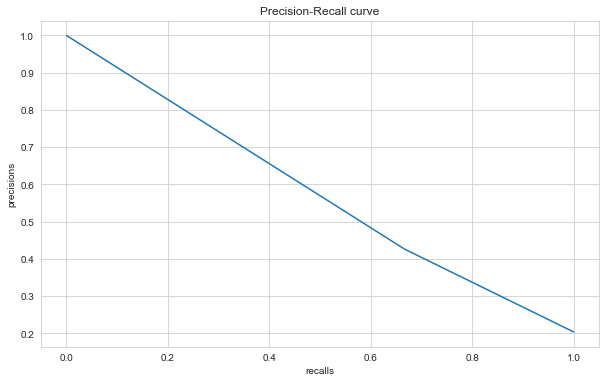

In [160]:
y_pred_proba = grid_model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

# Final Model and Model Deployment

In [167]:
tf.random.set_seed(1)

model = Sequential()

model.add(Dense(32, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
# grid search 0.1 buldu, sonuc kötü cikinca degeri 0.005 yaptim
opt = tf.keras.optimizers.RMSprop(learning_rate=0.005)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['Recall'])


In [168]:
early_stop = EarlyStopping(monitor = "val_recall", mode = "max", verbose = 1, patience = 30, restore_best_weights = True)


In [169]:
model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), batch_size = 128, epochs = 200, callbacks = [early_stop], class_weight=class_weights)


Epoch 1/200
71/71 [==============================] - 2s 7ms/step - loss: 0.6538 - recall: 0.5685 - val_loss: 0.5593 - val_recall: 0.5392
Epoch 2/200
71/71 [==============================] - 0s 3ms/step - loss: 0.6154 - recall: 0.6716 - val_loss: 0.5405 - val_recall: 0.5882
Epoch 3/200
71/71 [==============================] - 0s 3ms/step - loss: 0.5862 - recall: 0.7032 - val_loss: 0.5279 - val_recall: 0.6716
Epoch 4/200
71/71 [==============================] - 0s 3ms/step - loss: 0.5570 - recall: 0.7518 - val_loss: 0.4250 - val_recall: 0.3088
Epoch 5/200
71/71 [==============================] - 0s 3ms/step - loss: 0.5367 - recall: 0.7523 - val_loss: 0.6354 - val_recall: 0.8676
Epoch 6/200
71/71 [==============================] - 0s 3ms/step - loss: 0.5177 - recall: 0.7730 - val_loss: 0.4113 - val_recall: 0.4216
Epoch 7/200
71/71 [==============================] - 0s 3ms/step - loss: 0.5114 - recall: 0.7583 - val_loss: 0.7457 - val_recall: 0.9020
Epoch 8/200
71/71 [======================

<AxesSubplot:>

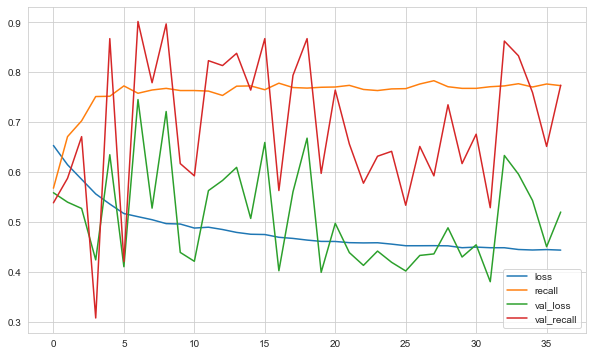

In [170]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [174]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ",  recall)

loss :  0.7456943392753601
recall :  0.9019607901573181


In [171]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[349 447]
 [ 20 184]]
              precision    recall  f1-score   support

           0       0.95      0.44      0.60       796
           1       0.29      0.90      0.44       204

    accuracy                           0.53      1000
   macro avg       0.62      0.67      0.52      1000
weighted avg       0.81      0.53      0.57      1000



## Prediction

In [175]:
exited_customer = df.drop('Exited', axis = 1).iloc[0:1, :]
exited_customer


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.000,1,1,1,101348.880,1,0,0,1,0


In [176]:
exited_customer = scaler.transform(exited_customer)
exited_customer

array([[0.538     , 0.32432432, 0.2       , 0.        , 0.        ,
        1.        , 1.        , 0.50678999, 1.        , 0.        ,
        0.        , 1.        , 0.        ]])

In [177]:
(model.predict(exited_customer) > 0.5).astype("int32")

1/1 [==============================] - 0s 24ms/step


array([[1]])

In [178]:
df["Exited"].iloc[0]

1

Hocam sonuclar mantikli cikmadi. grid seach ten makul sonuclar gelmedigi icin kendim ls degistirdim. gs e sokmadan önce daha iyi skorlar da almistim.

nasil daha iyi yapilabilir, geri dönus verirseniz memnun olurum

Bülent Akuklu

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___